# **Подготовка к анализу**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем библиотеки

In [174]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
import os
pd.set_option('display.max_columns', 100)

In [ ]:
ratings_df = pd.read_csv("ratings_small.csv", low_memory=False)

In [ ]:
links_df = pd.read_csv("links_small.csv", low_memory=False)

In [ ]:
keywords_df = pd.read_csv("keywords.csv", low_memory=False)

In [ ]:
movies_metadata_df = pd.read_csv("movies_metadata.csv", low_memory=False)

In [ ]:
credits_df = pd.read_csv("credits.csv", low_memory=False)

Посмотрим на данные. Мы проверяем количество строк и столбцов, выбираем 5 строк, а также запускаем предварительную статистику по данным.

In [ ]:
print("Ratings data contains {} rows and {} columns".format(ratings_df.shape[0], ratings_df.shape[1]))
print("Links data contains {} rows and {} columns".format(links_df.shape[0], links_df.shape[1]))
print("Movie metadata contains {} rows and {} columns".format(movies_metadata_df.shape[0], movies_metadata_df.shape[1]))
print("Credits data contains {} rows and {} columns".format(credits_df.shape[0], credits_df.shape[1]))
print("Keywords data contains {} rows and {} columns".format(keywords_df.shape[0], keywords_df.shape[1]))

Ratings data contains 100004 rows and 4 columns
Links data contains 9125 rows and 3 columns
Movie metadata contains 45466 rows and 24 columns
Credits data contains 45476 rows and 3 columns
Keywords data contains 46419 rows and 2 columns


In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0



Нам нужно будет извлечь жанры в виде списков строк с жанрами фильмов.

In [ ]:
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
from ast import literal_eval
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > l:
            names = names[:l]
        return names
    return []

movies_metadata_df['genres'] = movies_metadata_df['genres'].apply(literal_eval)
movies_metadata_df['genres'] = movies_metadata_df['genres'].apply(get_list)

Смотрим на типы данных

In [ ]:
pd.DataFrame({'feature':ratings_df.dtypes.index, 'dtype':ratings_df.dtypes.values})

,feature,dtype
0,userId,int64
1,movieId,int64
2,rating,float64
3,timestamp,int64


In [ ]:
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
pd.DataFrame({'feature':movies_metadata_df.dtypes.index, 'dtype':movies_metadata_df.dtypes.values})

,feature,dtype
0,adult,object
1,belongs_to_collection,object
2,budget,object
3,genres,object
4,homepage,object
5,id,object
6,imdb_id,object
7,original_language,object
8,original_title,object
9,overview,object


In [ ]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [ ]:
import datetime
min_time = datetime.datetime.fromtimestamp(min(ratings_df.timestamp)).isoformat()
max_time = datetime.datetime.fromtimestamp(max(ratings_df.timestamp)).isoformat()
print('Отметка времени для оценок от {} до {}:'.format(min_time, max_time))

Отметка времени для оценок от 1995-01-09T11:46:49 до 2016-10-16T17:57:24:


Проверяем пропуски

In [ ]:
def check_missing(data_df):
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

check_missing(ratings_df)

,userId,movieId,rating,timestamp
Total,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0


In [ ]:
check_missing(movies_metadata_df)

,belongs_to_collection,homepage,tagline,overview,poster_path,runtime,status,release_date,imdb_id,original_language,spoken_languages,title,video,vote_average,revenue,vote_count,popularity,production_companies,production_countries,original_title,id,genres,budget,adult
Total,40972.000000,37684.000000,25054.000000,954.000000,386.000000,263.000000,87.000000,87.000000,17.000000,11.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0
Percent,90.115691,82.883913,55.104914,2.098271,0.848986,0.578454,0.191352,0.191352,0.037391,0.024194,0.013197,0.013197,0.013197,0.013197,0.013197,0.013197,0.010997,0.006598,0.006598,0.0,0.0,0.0,0.0,0.0


6 фильмов без названия. Опустим эти строки.

In [ ]:
movies_metadata_df.dropna(subset=['title'], inplace=True)
check_missing(movies_metadata_df)

,belongs_to_collection,homepage,tagline,overview,poster_path,runtime,release_date,status,imdb_id,original_language,adult,vote_average,video,title,spoken_languages,production_companies,revenue,production_countries,popularity,original_title,id,genres,budget,vote_count
Total,40970.000000,37682.000000,25048.000000,954.000000,383.000000,257.000000,84.000000,81.000000,17.000000,11.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,90.123185,82.890453,55.098988,2.098548,0.842499,0.565332,0.184778,0.178179,0.037396,0.024197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movies_metadata_df['id'] = pd.to_numeric(movies_metadata_df['id'])

Фильтровать только голоса за фильмы в метаданных фильмов.

In [ ]:
ratings_df.shape

(100004, 4)

In [ ]:
ratings_df = ratings_df.merge(movies_metadata_df[['id']], left_on=['movieId'], right_on=['id'], how='inner')

In [ ]:
ratings_df.shape

(44994, 5)

# **Подготовка данных**


Извлечь дату и время

In [ ]:
ratings_df['time_dt'] = ratings_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp,id,time_dt
0,1,1371,2.5,1260759135,1371,2009-12-14 02:52:15
1,4,1371,4.0,949810302,1371,2000-02-06 04:11:42
2,7,1371,3.0,851869160,1371,1996-12-29 14:19:20
3,19,1371,4.0,855193404,1371,1997-02-06 01:43:24
4,21,1371,3.0,853852263,1371,1997-01-21 13:11:03


Давайте также извлечем несколько атрибутов даты/времени

In [ ]:
ratings_df['year'] = ratings_df['time_dt'].dt.year
ratings_df['month'] = ratings_df['time_dt'].dt.month
ratings_df['day'] = ratings_df['time_dt'].dt.day
ratings_df['dayofweek'] = ratings_df['time_dt'].dt.dayofweek

In [ ]:
ratings_df[['year', 'month', 'day', 'dayofweek']].describe()

,year,month,day,dayofweek
count,44994.000000,44994.000000,44994.000000,44994.000000
mean,2004.002734,6.798773,15.465640,2.871272
std,5.986696,3.517710,8.780353,2.007390
min,1995.000000,1.000000,1.000000,0.000000
25%,2000.000000,4.000000,8.000000,1.000000
50%,2003.000000,7.000000,16.000000,3.000000
75%,2008.000000,10.000000,23.000000,5.000000
max,2016.000000,12.000000,31.000000,6.000000


Все даты и время выглядят нормально, нам не нужно удалять или исправлять какие-либо значения.


Проверить распределение даты/времени.

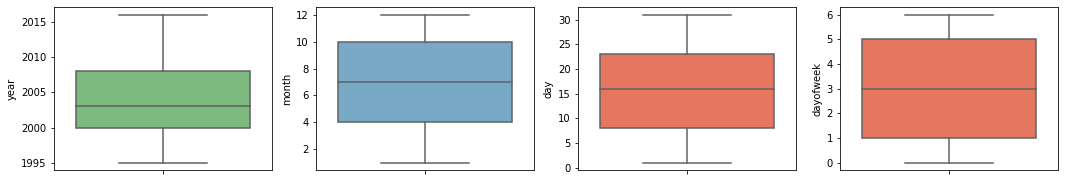

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18,3))
s = sns.boxplot(ax = ax1, y="year", data=ratings_df, palette="Greens",showfliers=True)
s = sns.boxplot(ax = ax2, y="month", data=ratings_df, palette="Blues",showfliers=True)
s = sns.boxplot(ax = ax3, y="day", data=ratings_df, palette="Reds",showfliers=True)
s = sns.boxplot(ax = ax4, y="dayofweek", data=ratings_df, palette="Reds",showfliers=True)
plt.show()


Покажем также количество и среднее значение изменения оценок во времени.

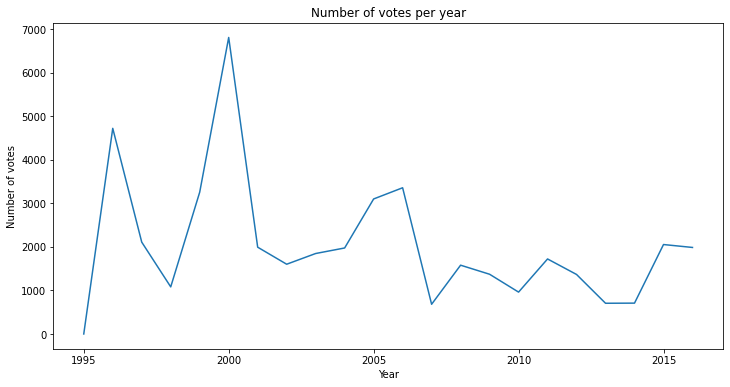

In [ ]:
dt = ratings_df.groupby(['year'])['rating'].count().reset_index()
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['year'],dt['rating']); plt.xlabel('Year'); plt.ylabel('Number of votes'); plt.title('Number of votes per year')
plt.show()

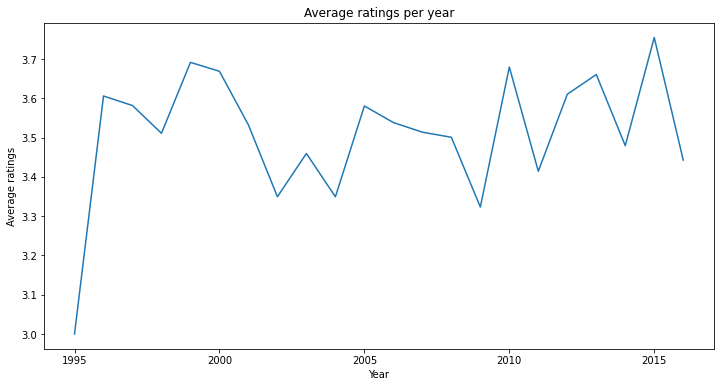

In [ ]:
dt = ratings_df.groupby(['year'])['rating'].mean().reset_index()
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['year'],dt['rating']); plt.xlabel('Year'); plt.ylabel('Average ratings'); plt.title('Average ratings per year')
plt.show()

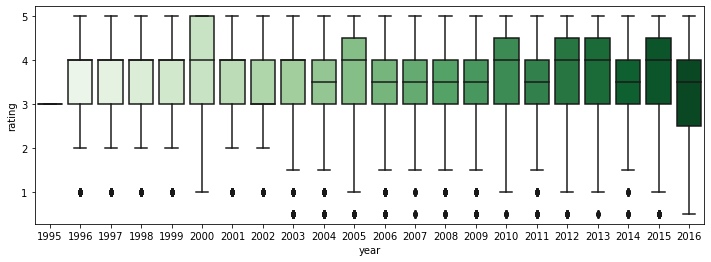

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,4))
s = sns.boxplot(x='year', y="rating", data=ratings_df, palette="Greens",showfliers=True)
plt.show()

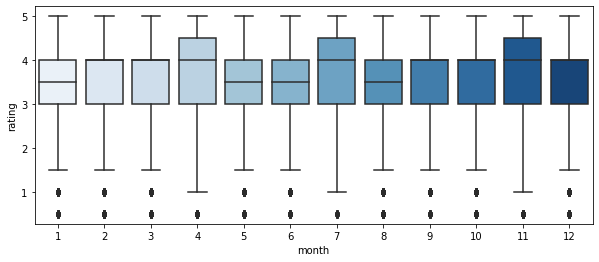

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(10,4))
s = sns.boxplot(x='month', y="rating", data=ratings_df, palette="Blues",showfliers=True)
plt.show()

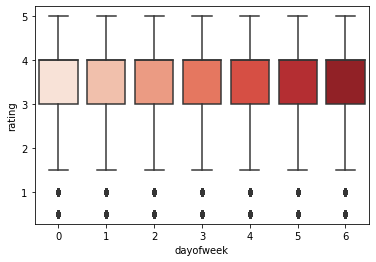

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(6,4))
s = sns.boxplot(x='dayofweek', y="rating", data=ratings_df, palette="Reds",showfliers=True)
plt.show()

Мы не наблюдаем особого поведения, кроме изменения во времени средних значений рейтингов, нисходящее поведение с 1995 по 2004 г., с двумя пиками в 1997 и 1999 гг. и восходящее поведение с 2004 по 2012 г.

Количество голосов показывает множество пиков и спадов, а также восходящий тренд к 2005 г., за которым следует нисходящий с 2005 г., резкий рост к 2015 г.

Для каждого года, месяца и дня недели существует несколько выбросов. Мы наблюдаем странные распределения рейтинга по годам на интервалах 1996-2002, 2003-2011 и 2012-2017 годов, что позволяет сделать вывод об искусственной выборке.

Распределение пользователей.

Давайте проверим, есть ли у нас специальные пользователи (пользователи, которые дают много голосов, пользователи, которые дают преимущественно высокие оценки, пользователи, которые дают в основном низкие оценки, пользователи, которые дают идеальное среднее значение). Кроме того, пользователи с одним голосом.

In [ ]:
print("Всего пользователей {}, со средним количеством голосов {}.".format(ratings_df.userId.nunique(), \
                                                round(ratings_df.shape[0]/ratings_df.userId.nunique()),2))

Всего пользователей 671, со средним количеством голосов 67.


In [ ]:
print("Топ 5 голосующих пользователей:\n")
tmp = ratings_df.userId.value_counts()[:5]
pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})

Топ 5 голосующих пользователей:



,Votes,Id
0,896,564
1,753,547
2,565,15
3,553,73
4,542,452


In [ ]:
tmp = ratings_df.userId.value_counts()
df = pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})
print("Есть {} пользователей, которые проголосовали только один раз.".format(df[df['Votes']==1].nunique().values[0]))

Есть 0 пользователей, которые проголосовали только один раз.


In [ ]:
tmp = ratings_df.groupby(['userId'])['rating'].mean().reset_index()
tmp['rating'] = tmp['rating'].apply(lambda x: round(x,3))
df_max = tmp[tmp['rating']==5]
df_min = tmp[tmp['rating']==0.5]
print("Пользователи дают только '5': {}\nПользователи дают только '0.5':{}".format(df_max.shape[0], df_min.shape[0]))

Пользователи дают только '5': 1
Пользователи дают только '0.5':0


In [ ]:
mean_rating = round(ratings_df['rating'].mean(),3)
print("Среднее значение рейтинга {}.".format(mean_rating))
print("Есть {} пользователей, у которых средний балл соответствует общему среднему баллу.".format(\
                            tmp[tmp['rating']==mean_rating]['userId'].nunique()))

Среднее значение рейтинга 3.561.
Есть 1 пользователей, у которых средний балл соответствует общему среднему баллу.


Распространение фильмов

Давайте посмотрим:

- какие фильмы набрали наибольшее количество голосов;

- с самым большим рейтингом / с самым низким рейтингом;

- сколько фильмов имеют рейтинг близкий к среднему.

In [ ]:
print("Всего есть {} фильмов со средним количеством голосов {}.".format(ratings_df.movieId.nunique(), \
                                                round(ratings_df.shape[0]/ratings_df.movieId.nunique()),2))

Всего есть 2830 фильмов со средним количеством голосов 16.


In [ ]:
print("Top 10 voted movies:\n")
tmp = ratings_df.movieId.value_counts()[:10]
pd.DataFrame({'Votes':tmp.values, 'id':tmp.index})

Top 10 voted movies:



,Votes,id
0,324,296
1,311,318
2,304,593
3,291,260
4,274,480
5,244,527
6,228,110
7,224,608
8,218,780
9,215,588


Какие это фильмы:

In [ ]:
top_10 = pd.DataFrame({'Votes':tmp.values, 'id':tmp.index}).merge(movies_metadata_df)
top_10

,Votes,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,324,296,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[Action, Thriller, Science Fiction]",NaN,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,20.818907,/lz4xYdF1n09lyiCfZWtWT44SZiG.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2003-07-02,435000000.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,5.9,2177.0
1,311,318,False,NaN,8000000,"[Drama, Thriller]",NaN,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,4.938231,/4wxOzpCjXY2RQgS3YoHuvKdItTF.jpg,"[{'name': 'Kintop Pictures', 'id': 1490}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Million Dollar Hotel,False,5.9,76.0
2,304,593,False,NaN,0,"[Drama, Science Fiction, Adventure, Mystery]",NaN,tt0069293,ru,Солярис,Ground control has been receiving strange tran...,11.059785,/nsGLKlwEOtqatz8yRdxOlAw5utr.jpg,"[{'name': 'Mosfilm', 'id': 5120}, {'name': 'Cr...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1972-03-20,0.0,167.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Solaris,False,7.7,364.0
3,291,260,False,NaN,0,"[Action, Thriller, Mystery]",NaN,tt0026029,en,The 39 Steps,"While on vacation in London, Canadian Richard ...",5.865697,/9v283GWj9a0AC8wwC4zriNqY1lZ.jpg,[{'name': 'Gaumont British Picture Corporation...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1935-06-01,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Handcuffed to the girl who double-crossed him,The 39 Steps,False,7.4,217.0
4,274,480,False,NaN,0,"[Comedy, Drama, Romance]",NaN,tt0265343,hi,Monsoon Wedding,From an exciting Indian wedding comes a relati...,10.625504,/2LysDwqhK0GlGtQqjPCiDeiBoqU.jpg,"[{'name': 'IFC Films', 'id': 307}, {'name': 'M...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2001-08-30,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A stressed father, a bride-to-be with a secret...",Monsoon Wedding,False,6.8,59.0
5,244,527,False,"{'id': 300546, 'name': 'Once were Warriors Col...",0,[Drama],NaN,tt0110729,en,Once Were Warriors,A drama about a Maori family lving in Auckland...,4.025276,/8QF48QS5lvtrhOclt22RFz3bSQm.jpg,"[{'name': 'Avalon Studios', 'id': 293}, {'name...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",1994-09-02,2201126.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A family in crisis, a life in chaos... Nothing...",Once Were Warriors,False,7.6,106.0
6,228,110,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,fr,Trois couleurs : Rouge,Red This is the third film from the trilogy by...,7.832755,/77CFEssoKesi4zvtADEpIrSKhA3.jpg,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
7,224,608,False,"{'id': 86055, 'name': 'Men In Black Collection...",140000000,"[Action, Adventure, Comedy, Science Fiction]",http://www.sonypictures.com/homevideo/meninbla...,tt0120912,en,Men in Black II,"Kay and Jay reunite to provide our best, last ...",16.775716,/qWjRfBwr4VculczswwojXgoU0mq.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-03,441818803.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Same Planet. New Scum.,Men in Black II,False,6.1,3188.0
8,218,780,False,NaN,0,"[Drama, History]",NaN,tt0019254,fr,La passion de Jeanne d'Arc,"A classic of the si

Теперь все фильмы в ratings_df присутствуют и в наборе данных movies_metadata_df.

In [ ]:
tmp = ratings_df.movieId.value_counts()
df = pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})
print("Есть {} фильмов, за которые проголосовали только один раз.".format(df[df['Votes']==1].nunique().values[0]))

Есть 1 фильмов, за которые проголосовали только один раз.


In [ ]:
tmp = ratings_df.groupby(['movieId'])['rating'].mean().reset_index()
tmp['rating'] = tmp['rating'].apply(lambda x: round(x,3))
df_max = tmp[tmp['rating']==5]
df_min = tmp[tmp['rating']==0.5]
print("Фильмы только с '5': {}\nФильмы только с '0.5':{}".format(df_max.shape[0], df_min.shape[0]))

Фильмы только с '5': 86
Фильмы только с '0.5':26


In [ ]:
mean_rating = round(ratings_df['rating'].mean(),3)
print("Среднее значение рейтинга: {}.".format(mean_rating))
print("Есть {} фильмов, средний балл которых совпадает с общим средним баллом.".format(\
                            tmp[tmp['rating']==mean_rating]['movieId'].nunique()))

Среднее значение рейтинга: 3.561.
Есть 1 фильмов, средний балл которых совпадает с общим средним баллом.



# **10 лучших фильмов**

Теперь создадим **статическую рейтинговую модель**, чтобы создать 10 лучших фильмов.

Мы будем использовать для этого формулу взвешенного рейтинга IMDB, а именно:

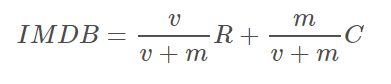
 
где:

IMDB — взвешенный рейтинг;

v — количество голосов за фильм;

m – минимальное количество голосов, необходимое для включения в расчет;

R — средний рейтинг фильма;

C - средний голос по всему набору.

Рассчитаем эти значения. 
Для m мы рассматриваем квантиль 0,9.

In [ ]:
tmp = ratings_df.groupby(['movieId'])['rating'].mean()
R = pd.DataFrame({'id':tmp.index, 'R': tmp.values})
tmp = ratings_df.groupby(['movieId'])['rating'].count()
v = pd.DataFrame({'id':tmp.index, 'v': tmp.values})
C = ratings_df['rating'].mean()

In [ ]:
m_df = movies_metadata_df.merge(R, on=['id'])
m_df = m_df.merge(v, on=['id'])
m_df['C'] = C
m= m_df['v'].quantile(0.9)
m_df['m'] = m

In [ ]:
m_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m
0,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.560986,44.0
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,3.560986,44.0
2,False,NaN,98000000,"[Action, Adventure]",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,3.560986,44.0
3,False,NaN,52000000,"[Drama, Crime]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.560986,44.0
4,False,NaN,16500000,"[Drama, Romance]",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,3.560986,44.0


Теперь мы можем показать 10 лучших фильмов по рейтингу IMDB.

In [ ]:
m_df['IMDB'] = (m_df['v'] / (m_df['v'] + m_df['m'])) * m_df['R'] + (m_df['m'] / (m_df['v'] + m_df['m'])) * m_df['C']

In [ ]:
m_df.sort_values(by=['IMDB'], ascending=False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m,IMDB
747,False,NaN,8000000,"[Drama, Thriller]",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,4.938231,/4wxOzpCjXY2RQgS3YoHuvKdItTF.jpg,"[{'name': 'Kintop Pictures', 'id': 1490}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Million Dollar Hotel,False,5.9,76.0,4.487138,311,3.560986,44.0,4.372348
102,False,NaN,21000000,"[Comedy, Drama, Romance]",NaN,858,tt0108160,en,Sleepless in Seattle,A young boy who tries to set his dad up on a d...,10.234919,/afkYP15OeUOD0tFEmj6VvejuOcz.jpg,"[{'name': 'TriStar Pictures', 'id': 559}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-06-24,227799884.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What if someone you never met, someone you nev...",Sleepless in Seattle,False,6.5,630.0,4.487500,200,3.560986,44.0,4.320424
48,False,"{'id': 300546, 'name': 'Once were Warriors Col...",0,[Drama],NaN,527,tt0110729,en,Once Were Warriors,A drama about a Maori family lving in Auckland...,4.025276,/8QF48QS5lvtrhOclt22RFz3bSQm.jpg,"[{'name': 'Avalon Studios', 'id': 293}, {'name...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",1994-09-02,2201126.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A family in crisis, a life in chaos... Nothing...",Once Were Warriors,False,7.6,106.0,4.303279,244,3.560986,44.0,4.189873
1042,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[Action, Thriller, Science Fiction]",NaN,296,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,20.818907,/lz4xYdF1n09lyiCfZWtWT44SZiG.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2003-07-02,435000000.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,5.9,2177.0,4.256173,324,3.560986,44.0,4.173053
929,False,"{'id': 86055, 'name': 'Men In Black Collection...",140000000,"[Action, Adventure, Comedy, Science Fiction]",http://www.sonypictures.com/homevideo/meninbla...,608,tt0120912,en,Men in Black II,"Kay and Jay reunite to provide our best, last ...",16.775716,/qWjRfBwr4VculczswwojXgoU0mq.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-03,441818803.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Same Planet. New Scum.,Men in Black II,False,6.1,3188.0,4.256696,224,3.560986,44.0,4.142475
174,False,NaN,0,"[Action, Thriller, Mystery]",NaN,260,tt0026029,en,The 39 Steps,"While on vacation in London, Canadian Richard ...",5.865697,/9v283GWj9a0AC8wwC4zriNqY1lZ.jpg,[{'name': 'Gaumont British Picture Corporation...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1935-06-01,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Handcuffed to the girl who double-crossed him,The 39 Steps,False,7.4,217.0,4.221649,291,3.560986,44.0,4.134876
925,False,NaN,0,"[Action, Western, Thriller]",NaN,4993,tt0062626,en,5 Card Stud,The players in an ongoing poker game are being...,1.372254,/gev2WX8alGl0f7Ql0JZfeOY8uDg.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1968-07-28,0.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A card cheat was hung... then all hell broke l...,5 Card Stud,False,6.0,20.0,4.182500,200,3.560986,44.0,4.070424
1804,False,NaN,35000000,[Comedy],http://licensetowedthemovie.warnerbros.com/,2959,tt0762114,en,License to Wed,"Newly engaged, Ben and Sadie can't wait to sta...",7.102076,/9I8NiY5cfFmwgI8Y5NKQqsuDawS.jpg,"[{'name': 'Village Roadshow Picture


Статическая модель IMDB: топ-10
Это наша эталонная модель.

In [ ]:
m_df[['title', 'IMDB']].sort_values(by=['IMDB'], ascending=False).head(10)

,title,IMDB
747,The Million Dollar Hotel,4.372348
102,Sleepless in Seattle,4.320424
48,Once Were Warriors,4.189873
1042,Terminator 3: Rise of the Machines,4.173053
929,Men in Black II,4.142475
174,The 39 Steps,4.134876
925,5 Card Stud,4.070424
1804,License to Wed,4.067819
650,Solaris,4.065182
2400,Shriek If You Know What I Did Last Friday the ...,4.060701


Давайте сравним эту модель с топ-10 только по количеству голосов и по общему количеству голосов.



Топ-10 по количеству голосов

In [ ]:
m_df['R_x_v'] = m_df['R'] * m_df['v']

In [ ]:
m_df[['title', 'v']].sort_values(by=['v'], ascending=False).head(10)

,title,v
1042,Terminator 3: Rise of the Machines,324
747,The Million Dollar Hotel,311
650,Solaris,304
174,The 39 Steps,291
885,Monsoon Wedding,274
48,Once Were Warriors,244
53,Three Colors: Red,228
929,Men in Black II,224
1109,The Passion of Joan of Arc,218
1646,Silent Hill,215



Топ-10 по произведению среднего рейтинга и количества голосов

In [ ]:
m_df[['title', 'R_x_v']].sort_values(by=['R_x_v'], ascending=False).head(10)

,title,R_x_v
747,The Million Dollar Hotel,1395.5
1042,Terminator 3: Rise of the Machines,1379.0
650,Solaris,1258.0
174,The 39 Steps,1228.5
48,Once Were Warriors,1050.0
885,Monsoon Wedding,1015.5
929,Men in Black II,953.5
53,Three Colors: Red,899.5
102,Sleepless in Seattle,897.5
1804,License to Wed,844.0



**Простая модель**, использующая сходство с названием фильма
Модель будет использовать сходство, рассчитанное на основе названия фильма.

Мы будем использовать уже рассчитанный набор данных m_df.

Методы вычисления подобия косинусов взяты из:

https://www.kaggle.com/fabiendaniel/film-recommendation-engine

https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',max_features=10000)
tokens = m_df[['title']]
tokens['title'] = tokens['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(tokens['title'])
print(tfidf_matrix.shape)
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(tokens.index, index=tokens['title']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return tokens['title'].iloc[movie_indices]

(2831, 3222)
(2831, 2831)


In [ ]:
get_recommendations('The Million Dollar Hotel')

1458       Million Dollar Baby
1191    One Million Years B.C.
2407        Hotel Very Welcome
1242    How to Steal a Million
1459              Hotel Rwanda
2331          Heartbreak Hotel
1536      Billion Dollar Brain
0                         Heat
1                    GoldenEye
2             Cutthroat Island
Name: title, dtype: object

In [ ]:
get_recommendations('Sleepless in Seattle')

0                         Heat
1                    GoldenEye
2             Cutthroat Island
3                       Casino
4        Sense and Sensibility
5                   Four Rooms
6                   Get Shorty
7            Leaving Las Vegas
8    The City of Lost Children
9               Twelve Monkeys
Name: title, dtype: object

**Комбинированная** модель, использующая сходство и популярность.

В этой модели используется как фактор сходства, основанный на названии фильма, так и рейтинг популярности, основанный на рейтинге IMDB.

Мы модифицируем функцию get_recommendation, чтобы она возвращала 50 похожих заголовков; мы упорядочиваем названия, используя показатель популярности.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',max_features=10000)
tokens = m_df[['title']]
tokens['title'] = tokens['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(tokens['title'])
print(tfidf_matrix.shape)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(tokens.index, index=tokens['title']).drop_duplicates()

(2831, 3222)
(2831, 2831)


In [ ]:
def get_imdb_score(df, indices):
    tmp = df[df.id.isin(indices)]
    tmp = tmp.sort_values(by='IMDB', ascending=False)
    return tmp[['title','IMDB']].head(10)

In [ ]:
def get_10_recommendations_simpol(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:21]

    movie_indices = [i[0] for i in sim_scores]

    pop_scores = get_imdb_score(m_df, movie_indices)
    
    return list(pop_scores['title'])

In [ ]:
get_10_recommendations_simpol('The Million Dollar Hotel')

['Judgment Night',
 'Star Wars',
 'Jesus',
 'Ariel',
 'Four Rooms',
 'Finding Nemo',
 'Shadows in Paradise']

In [ ]:
get_10_recommendations_simpol('Judgment Night')

['Cat on a Hot Tin Roof',
 'Marlowe',
 'Three Colors: Blue',
 'The Secret Life of Words',
 'Harry Potter and the Half-Blood Prince',
 'Lady Snowblood',
 'Hellboy',
 'Sleepy Hollow',
 'The Aviator',
 'Short Circuit']

In [ ]:
get_10_recommendations_simpol('Fahrenheit 9/11')

['Dancer in the Dark',
 'The Dark',
 'Judgment Night',
 'Star Wars',
 'Forrest Gump',
 'American Beauty',
 'The Fifth Element',
 'Ariel',
 'Four Rooms',
 'Finding Nemo']

# **Заключение**


Были созданы три простые модели рекомендаций:

 - Одна модель, независимая от пользователя, основанная на средних оценках фильма и количестве голосов, это в основном модель рейтинга IMDB. 
Эта модель предоставляет рекомендацию из 10 лучших фильмов, начиная с фильма, выбранного пользователем;

 - Одна модель, в зависимости от сходства названий;

 - Одна модель, в зависимости от сходства названий и рейтинга IMDB.